# Lets consider the following data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('7_2.txt', sep = ' ', header=0, index_col=0)

df["lnY"] = np.log(df["Y"])
df["lnX"] = np.log(df['X'])


y = df["Y"]
X = df["X"]
X = sm.add_constant(X)

model1 = sm.OLS(y,X).fit()

lny = df['lnY']
lnX = df['lnX']
lnX = sm.add_constant(lnX)
model2 = sm.OLS(lny,lnX).fit()

         Y     X       lnY       lnX
Year                                
1970  2.57  0.77  0.943906 -0.261365
1971  2.50  0.74  0.916291 -0.301105
1972  2.35  0.72  0.854415 -0.328504
1973  2.30  0.73  0.832909 -0.314711
1974  2.25  0.76  0.810930 -0.274437
1975  2.20  0.75  0.788457 -0.287682
1976  2.11  1.08  0.746688  0.076961
1977  1.94  1.81  0.662688  0.593327
1978  1.97  1.39  0.678034  0.329304
1979  2.06  1.20  0.722706  0.182322
1980  2.02  1.17  0.703098  0.157004


# Computing OLS

In [2]:
print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     17.69
Date:                Wed, 01 Jul 2020   Prob (F-statistic):            0.00229
Time:                        17:57:26   Log-Likelihood:                 8.0481
No. Observations:                  11   AIC:                            -12.10
Df Residuals:                       9   BIC:                            -11.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6911      0.122     22.127      0.0

c:\users\samantpradeep\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Since we can't directly compare R squared we convert Ye to lnYe

In [4]:
model2.conf_int()

,0,1
const,0.742938,0.811898
lnX,-0.364738,-0.141354


In [17]:
const = model1.params["const"]
xcoef = model1.params['X']

In [20]:
Ye = const + xcoef*df['X']
df['Ye'] = Ye
df['lnYe'] = np.log(Ye)
df

,Y,X,lnY,lnX,Ye,lnYe
Year,,,,,,
1970,2.57,0.77,0.943906,-0.261365,2.321887,0.842380
1971,2.50,0.74,0.916291,-0.301105,2.336272,0.848557
1972,2.35,0.72,0.854415,-0.328504,2.345863,0.852653
1973,2.30,0.73,0.832909,-0.314711,2.341068,0.850607
1974,2.25,0.76,0.810930,-0.274437,2.326682,0.844443
1975,2.20,0.75,0.788457,-0.287682,2.331477,0.846502
1976,2.11,1.08,0.746688,0.076961,2.173233,0.776216
1977,1.94,1.81,0.662688,0.593327,1.823176,0.600580
1978,1.97,1.39,0.678034,0.329304,2.024579,0.705362


In [56]:
yi = df['lnY'] - np.mean(df['lnY'])
ye = df['lnYe'] - np.mean(df['lnY'])
numerator = np.sum(yi*ye)**2
denominator = np.sum(yi**2)*np.sum(ye**2)
rsquared = numerator/denominator
print('log model rsquared = ' , model2.rsquared)
print('linear model rsquared converted = ', rsquared)

log model rsquared =  0.7448003804081643
linear model rsquared converted =  0.6778336692595957


### Conclusion: Comparing the two values it seems that log model is a better fit

# Why does "ESS/TSS" give different results than eq. 3.5.15?

In [53]:
# ess_ = (df['lnYe'] - np.mean(df['lnY']))**2
# ess = np.sum(ess_)
# tss = (df['lnY'] - np.mean(df['lnY']))**2
# tss = np.sum(tss)
# rsquared = ess/tss
# rsquared
yi = df['lnY'] - np.mean(df['lnY'])
ye = df['lnYe'] - np.mean(df['lnY'])
numerator = np.sum(yi*ye)**2
denominator = np.sum(yi**2)*np.sum(ye**2)
rsquared = numerator/denominator
print('eq 3.5.14 : ', rsquared)
rsquared2 = np.sum(ye**2)/np.sum(yi**2)
print('ESS/TSS: ', rsquared2)

eq 3.5.14 :  0.6778336692595957
ESS/TSS:  0.7435600886138566


In [45]:
yi = df['Y'] - np.mean(df['Y'])
ye = df['Ye'] - np.mean(df['Y'])
numerator = np.sum(yi*ye)**2
denominator = np.sum(yi**2)*np.sum(ye**2)
rsquared = numerator/denominator
print(rsquared)
rsquared2 = np.sum(ye**2)/np.sum(yi**2)
rsquared2

0.6627571891783129


0.6627571891783139

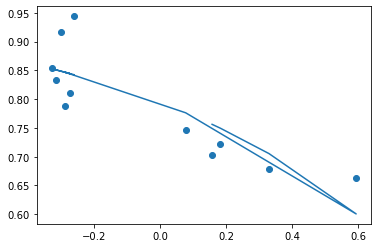

In [50]:
# fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3)
plt.figure()
plt.scatter(df['lnX'],df['lnY'])
plt.plot(df['lnX'], df['lnYe'])

### Ans. ln(Ye) is not a straight line. infact it bends backwards